In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc, roc_auc_score
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

In [2]:
X, y = make_classification(n_samples = 2000, n_features = 2,
                           n_redundant = 0,
                           n_informative = 1,
                           n_clusters_per_class = 1, 
                           random_state = 3,
                           class_sep = 2,
                           flip_y = 0.1,
                           n_classes = 2)

In [3]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,Response
0,-1.653148,-2.036685,0
1,-0.458612,-2.095498,0
2,1.486651,-1.888864,0
3,-0.241126,-2.040498,0
4,-2.249821,2.571902,1


In [4]:
X = data.drop(["Response"], axis = 1)
y = data.Response

X.shape, y.shape

((2000, 2), (2000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 2)
X_test shape: (400, 2)
y_train shape: (1600,)
y_test shape: (400,)


In [6]:
knn = KNeighborsClassifier()

params = {
    "n_neighbors": np.arange(30) + 1
}

model = GridSearchCV(knn, param_grid = params, cv = 10)
model.fit(X_train, y_train)

print("Best parameter:", model.best_params_)
print("Best score:", model.best_score_)

Best parameter: {'n_neighbors': 7}
Best score: 0.9506249999999999


### KNN

In [7]:
knn_optimal = KNeighborsClassifier(n_neighbors = 6)

knn_optimal.fit(X_train, y_train)

train_score = knn_optimal.score(X_train, y_train)
test_score = knn_optimal.score(X_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.95125
Test score: 0.95


### Logistic Regression

In [8]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_model_train_score = logreg_model.score(X_train, y_train)
logreg_model_test_score = logreg_model.score(X_test, y_test)

print("Logistic Regression train score:", logreg_model_train_score)
print("Logistic Regression test score:", logreg_model_test_score)

Logistic Regression train score: 0.948125
Logistic Regression test score: 0.9525


### LDA

In [9]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model_train_score = lda_model.score(X_train, y_train)
lda_model_score = lda_model.score(X_test, y_test)

print("LDA model score:", lda_model_score)
print("LDA model train score:", lda_model_train_score)

LDA model score: 0.95
LDA model train score: 0.94625


### QDA

In [10]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_model_train_score = qda_model.score(X_train, y_train)
qda_model_test_score = qda_model.score(X_test, y_test)

print("QDA model train score:", qda_model_train_score)
print("QDA model test score:", qda_model_test_score)

QDA model train score: 0.9475
QDA model test score: 0.9525


In [11]:
print("Logistic Regression train score:", logreg_model_train_score)
print("Logistic Regression test score:", logreg_model_test_score)
print("LDA model score:", lda_model_score)
print("LDA model train score:", lda_model_train_score)
print("QDA model train score:", qda_model_train_score)
print("QDA model test score:", qda_model_test_score)

Logistic Regression train score: 0.948125
Logistic Regression test score: 0.9525
LDA model score: 0.95
LDA model train score: 0.94625
QDA model train score: 0.9475
QDA model test score: 0.9525


### Train decision boundaries

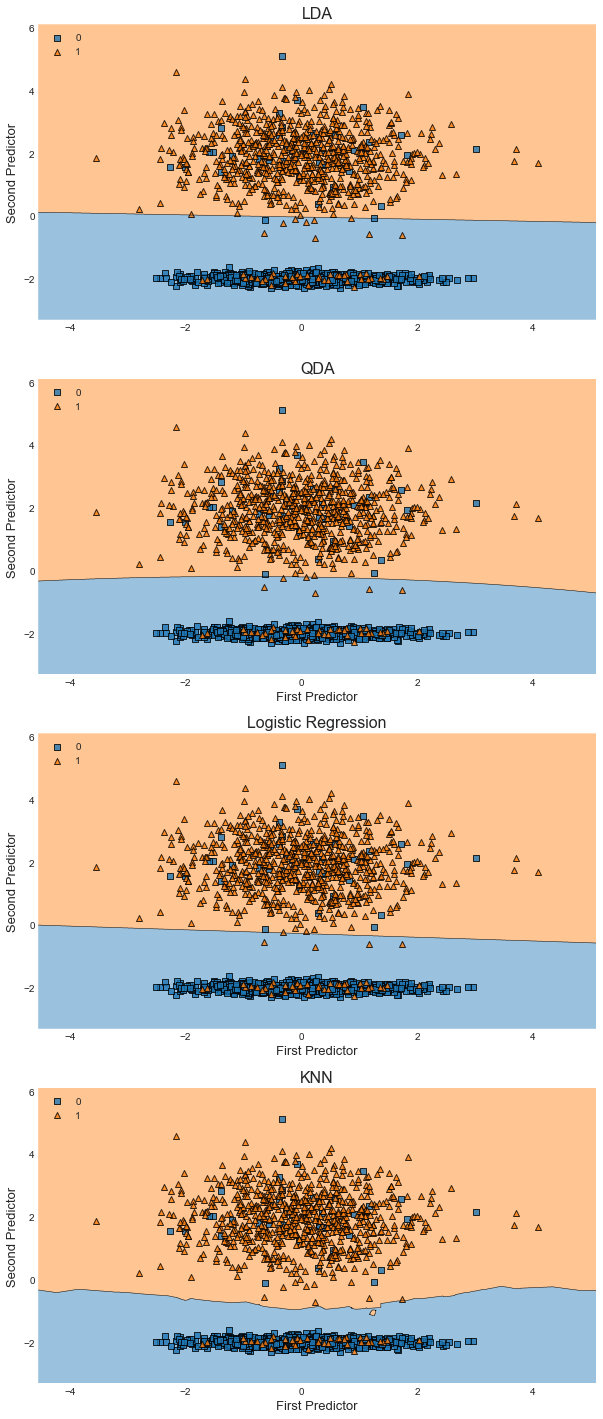

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 25))

ax1 = plot_decision_regions(np.array(X_train), np.array(y_train), clf = lda_model, legend = 2, ax = ax1)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax1.set_ylabel("Second Predictor", fontsize = 13)
ax1.set_title("LDA", fontsize = 16)
ax2 = plot_decision_regions(np.array(X_train), np.array(y_train), clf = qda_model, legend = 2, ax = ax2)
ax2.set_title("QDA", fontsize = 16)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax2.set_ylabel("Second Predictor", fontsize = 13)
ax3 = plot_decision_regions(np.array(X_train), np.array(y_train), clf = logreg_model, legend = 2, ax = ax3)
ax3.set_title("Logistic Regression", fontsize = 16)
ax3.set_xlabel("First Predictor", fontsize = 13)
ax3.set_ylabel("Second Predictor", fontsize = 13)
ax4 = plot_decision_regions(np.array(X_train), np.array(y_train), clf = knn_optimal, legend = 2, ax = ax4)
ax4.set_title("KNN", fontsize = 16)
ax4.set_xlabel("First Predictor", fontsize = 13)
ax4.set_ylabel("Second Predictor", fontsize = 13)

plt.show()

### Test decision boundaries

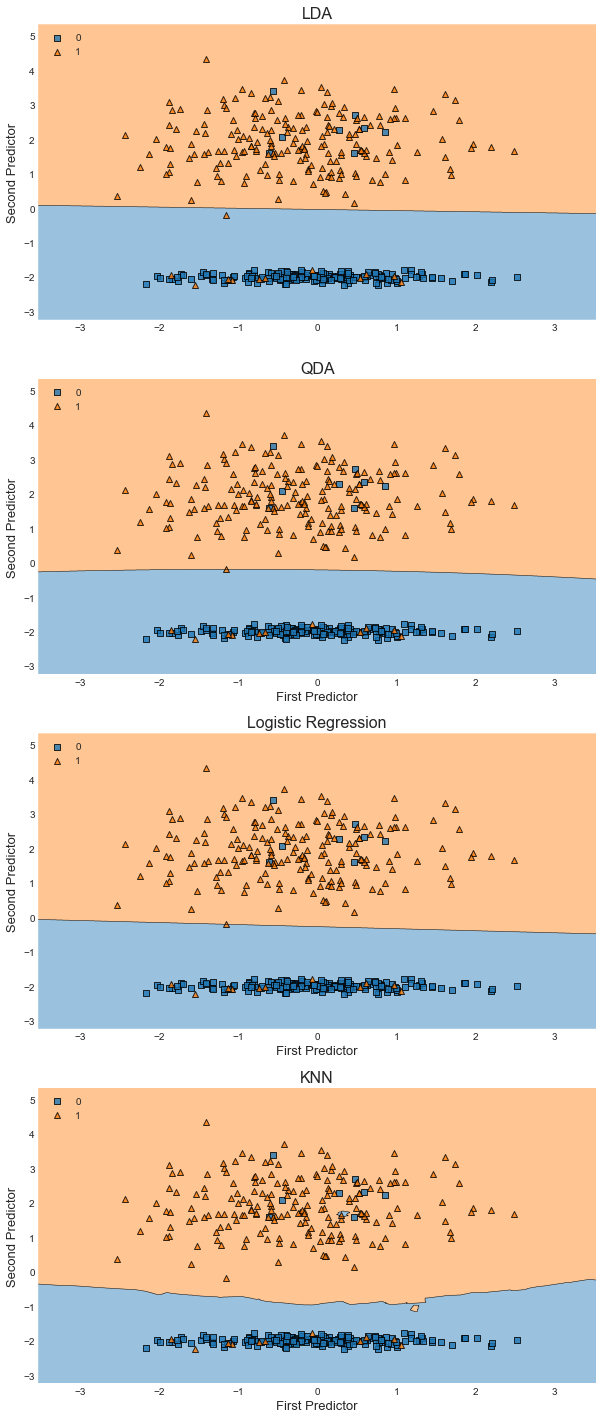

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 25))

ax1 = plot_decision_regions(np.array(X_test), np.array(y_test), clf = lda_model, legend = 2, ax = ax1)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax1.set_ylabel("Second Predictor", fontsize = 13)
ax1.set_title("LDA", fontsize = 16)
ax2 = plot_decision_regions(np.array(X_test), np.array(y_test), clf = qda_model, legend = 2, ax = ax2)
ax2.set_title("QDA", fontsize = 16)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax2.set_ylabel("Second Predictor", fontsize = 13)
ax3 = plot_decision_regions(np.array(X_test), np.array(y_test), clf = logreg_model, legend = 2, ax = ax3)
ax3.set_title("Logistic Regression", fontsize = 16)
ax3.set_xlabel("First Predictor", fontsize = 13)
ax3.set_ylabel("Second Predictor", fontsize = 13)
ax4 = plot_decision_regions(np.array(X_test), np.array(y_test), clf = knn_optimal, legend = 2, ax = ax4)
ax4.set_title("KNN", fontsize = 16)
ax4.set_xlabel("First Predictor", fontsize = 13)
ax4.set_ylabel("Second Predictor", fontsize = 13)

plt.show()

### ROC Curves

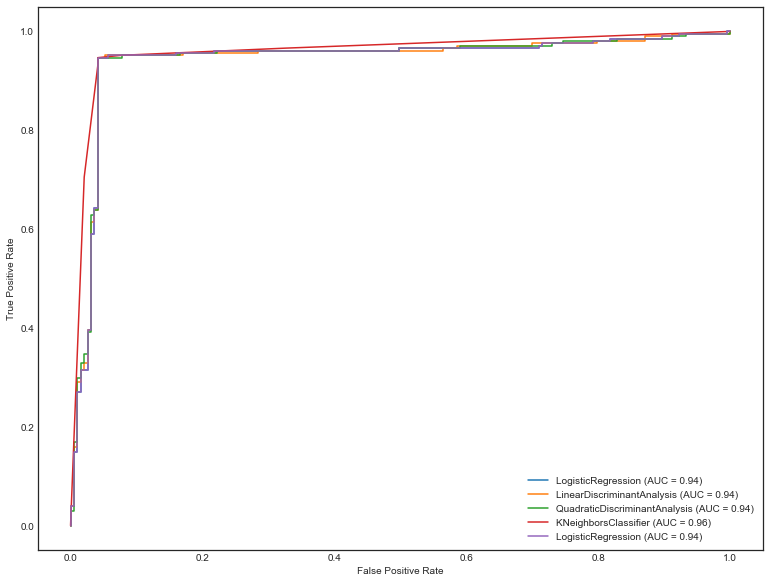

In [14]:
fig = plt.figure(figsize = (13, 10))
ax = plt.gca()
logreg_disp = plot_roc_curve(logreg_model, X_test, y_test, ax = ax)
lda_disp = plot_roc_curve(lda_model, X_test, y_test, ax = ax)
qda_disp = plot_roc_curve(qda_model, X_test, y_test, ax = ax)
knn_disp = plot_roc_curve(knn_optimal, X_test, y_test, ax = ax)
logreg_disp.plot(ax = ax)
plt.show()

In [15]:
logreg_proba = logreg_model.predict_proba(X_test)
lda_proba = lda_model.predict_proba(X_test)
qda_proba = qda_model.predict_proba(X_test)
knn_proba = knn_optimal.predict_proba(X_test)

fpr_log, tpr_log, threshold_log = roc_curve(y_test, logreg_proba[:, 1], pos_label = 1)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_test, lda_proba[:, 1], pos_label = 1)
fpr_qda, tpr_qda, threshold_qda = roc_curve(y_test, qda_proba[:, 1], pos_label = 1)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, knn_proba[:, 1], pos_label = 1)


auc_logreg = auc(fpr_log, tpr_log)
auc_lda = auc(fpr_lda, tpr_lda)
auc_qda = auc(fpr_qda, tpr_qda)
auc_knn = auc(fpr_knn, tpr_knn)

auc_logreg, auc_lda, auc_qda, auc_knn

(0.9420540161698079,
 0.9422542614703011,
 0.9430302120097118,
 0.9593877499937422)

In [16]:
print("Logistic Regression test score:", logreg_model_test_score)
print("LDA model test score:", lda_model_score)
print("QDA model test score:", qda_model_test_score)
print("KNN model Test score:", test_score)

Logistic Regression test score: 0.9525
LDA model test score: 0.95
QDA model test score: 0.9525
KNN model Test score: 0.95
